In [3]:
import tensorflow as tf
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt



4423680/4422102 [==============================] - 3s 1us/step


NameError: name 'x_test' is not defined

## Plotting

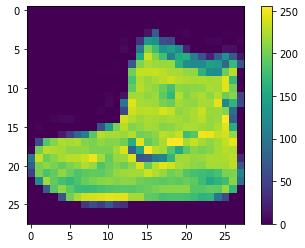

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Scale the images

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

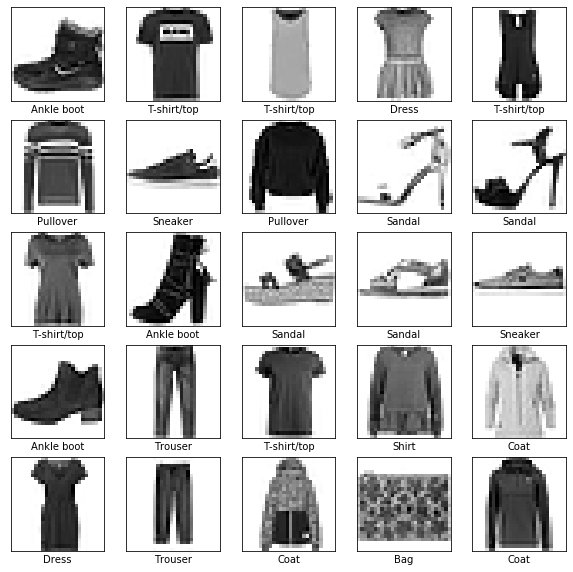

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Compile The Model

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [27]:

model.fit(train_images, train_labels, epochs=1)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
previous_TA=0
previous_testloss=0
previous_TA,previous_testloss=test_acc,test_loss
print('\nTest accuracy:', test_acc)
current_epochs=0
DoNext=True

while(DoNext):
    next_epochs=current_epochs+1
    if((test_acc*100)<90):
        model.fit(test_images,test_labels,epochs=next_epochs)
        test_loss,test_accuracy=model.evaluate(test_images,test_labels)
        previous_TA,previous_testloss=test_accuracy,test_loss
    else:
        DoNext=False

Train on 60000 samples
60000/60000 [==============================] - 8s 128us/sample - loss: 0.4212 - accuracy: 0.8523
10000/10000 - 1s - loss: 0.4531 - accuracy: 0.8376

Test accuracy: 0.8376
Train on 10000 samples
10000/10000 [==============================] - 1s 80us/sample - loss: 0.4492 - accuracy: 0.8381
Train on 10000 samples
10000/10000 [==============================] - 1s 68us/sample - loss: 0.4467 - accuracy: 0.8404
Train on 10000 samples
10000/10000 [==============================] - 1s 77us/sample - loss: 0.4430 - accuracy: 0.8414
Train on 10000 samples
10000/10000 [==============================] - 1s 78us/sample - loss: 0.4399 - accuracy: 0.8411
Train on 10000 samples
10000/10000 [==============================] - 1s 71us/sample - loss: 0.4435 - accuracy: 0.8413
Train on 10000 samples
10000/10000 [==============================] - 1s 73us/sample - loss: 0.4385 - accuracy: 0.8426
Train on 10000 samples
10000/10000 [==============================] - 1s 60us/sample - loss:

KeyboardInterrupt: 

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 1s - loss: 0.5301 - accuracy: 0.8102


### Examining the test label shows that this classification is correct:

In [30]:
predictions = model.predict(test_images)
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

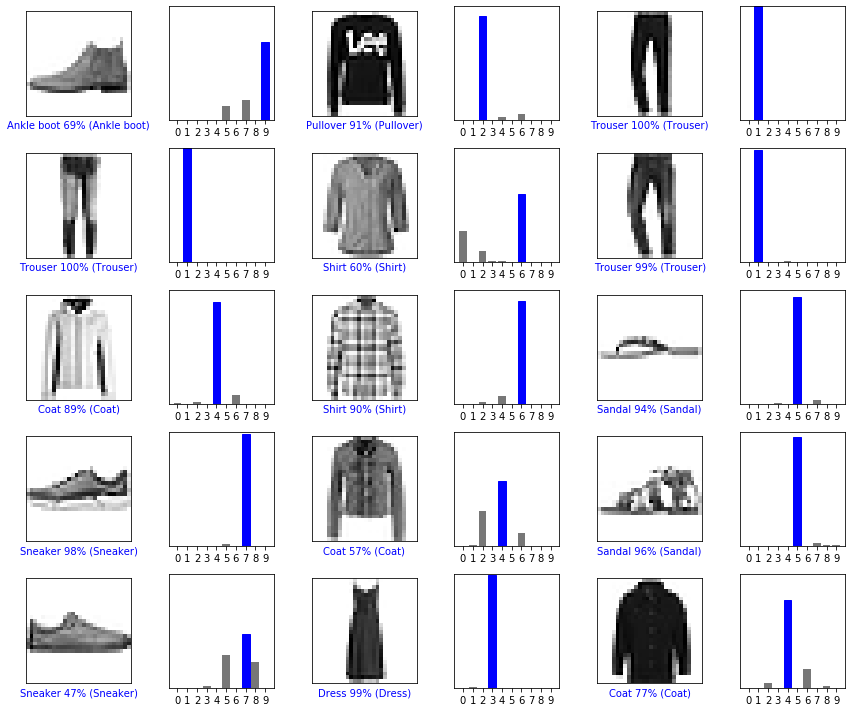

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()